In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [17]:
#python kodu buraya
mean = titanic.groupby(['Sex'])['Survived'].mean().to_dict()
titanic["Sex"] = titanic["Sex"].map(mean)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0.188908,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0.742038,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.742038,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0.188908,26.0,0,0,111369,30.0000,C148,C


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [18]:
#python kodu buraya
from sklearn.preprocessing import OneHotEncoder
titanic_onehot = titanic.copy()
#embarked_onehot=pd.get_dummies(titanic,columns=["Embarked"])
emon=OneHotEncoder(sparse=False)
titanic_onehot.Embarked.fillna(titanic_onehot["Embarked"].mode()[0], inplace=True)
encoded = emon.fit_transform(titanic_onehot[["Embarked"]]).astype(np.uint8)
cat = emon.categories_[0].tolist()
pd.DataFrame(encoded, columns=cat)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [25]:
#python kodu buraya
from sklearn.preprocessing import LabelEncoder
df_lab=titanic.copy()
lbl=LabelEncoder()
df_lab["Cabin"] = df_lab["Cabin"].astype(str)
df_lab["Cabin"] = lbl.fit_transform(df_lab["Cabin"])
df_lab

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,147,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,81,C
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,147,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,55,S
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,147,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0.188908,27.0,0,0,211536,13.0000,147,S
887,888,1,1,"Graham, Miss. Margaret Edith",0.742038,19.0,0,0,112053,30.0000,30,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.742038,NaN,1,2,W./C. 6607,23.4500,147,S
889,890,1,1,"Behr, Mr. Karl Howell",0.188908,26.0,0,0,111369,30.0000,60,C


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

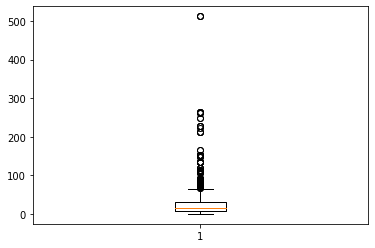

In [26]:
#python kodu buraya
plt.boxplot(titanic.Fare)
plt.show()

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [27]:
#python kodu buraya
titanz=titanic.copy()
zscore= (titanic.Fare - titanz.Fare.mean()) / titanz.Fare.std()
zscore

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64

In [28]:
(zscore>3).sum(),(zscore<-3).sum()


(20, 0)

In [29]:
outliers=~((zscore>3) | (zscore<-3))
outliers

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Fare, Length: 891, dtype: bool

In [30]:
maxx=titanz[outliers]["Fare"].max() 
minn=titanz[outliers]["Fare"].min()
print(maxx,minn)

164.8667 0.0


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [31]:
#python kodu buraya
upper_replace = titanz[zscore<=3]["Fare"].max()
lower_replace = titanz[zscore>=-3]["Fare"].min()
print(upper_replace,lower_replace)


164.8667 0.0


In [32]:
zscore_replaced = titanic.copy()
zscore_replaced["Fare"][zscore>3] = upper_replace
zscore_replaced["Fare"][zscore<-3] = lower_replace

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
zscore_replaced["Fare"].min(), zscore_replaced["Fare"].max(), zscore_replaced.shape

(0.0, 164.8667, (891, 12))

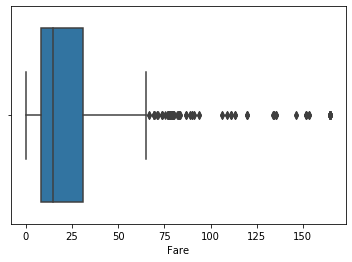

In [34]:
sns.boxplot(zscore_replaced.Fare)

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [35]:
#python kodu buraya
q1 = titanic.Fare.quantile(q=0.25)
q3 = titanic.Fare.quantile(q=0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

lower_limit, upper_limit


(-26.724, 65.6344)

In [36]:


outliers=((titanic["Fare"]>upper_limit) | (titanic["Fare"]<lower_limit))
outliers.sum() #outliers sayısı


116

In [37]:
print(titanic[outliers].Fare.max()," \n",titanic[outliers].Fare.min()) #outlier değerleri


512.3292  
 66.6


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [38]:
#python kodu buraya
titaniqr = titanic.copy()
titaniqr["Fare"][titanic["Fare"] > upper_limit] = upper_limit
titaniqr["Fare"][titanic["Fare"] < lower_limit] = lower_limit

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
titaniqr["Fare"].min(), titaniqr["Fare"].max(), titaniqr.shape

(0.0, 65.6344, (891, 12))

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [40]:
#python kodu buraya
upper = titanic["Fare"].quantile(q=0.99)
lower = titanic["Fare"].quantile(q=0.01)

In [41]:
print("Lower: ",lower,"Upper: ",upper)

Lower:  0.0 Upper:  249.00622000000033


In [42]:
outliersum = ((titanic.Fare > upper) | (titanic.Fare < lower_limit))
outliersum.sum() #outlier sayısı

9

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [43]:
#python kodu burayatitan_he_replaced = titanic.copy()
titanreplaced = titanic.copy()
titanreplaced["Fare"][titanic["Fare"] > upper] = upper
titanreplaced["Fare"][titanic["Fare"] < lower] = lower

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
titanreplaced["Fare"].min(), titanreplaced["Fare"].max(), titanreplaced.shape

(0.0, 249.00622000000033, (891, 12))

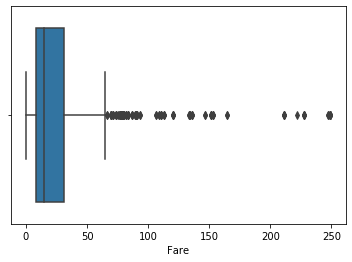

In [45]:
sns.boxplot(titanreplaced.Fare)

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [50]:
print("Z-score ile bulunan outlier sayısı:",(zscore>3).sum())
print("Iqr ile bulunan outlier sayısı: ",outliers.sum())
print("Hard Edges ile bulunan outlier sayısı: ",outliersum.sum())
print("Hart Edges yönteminde daha az outlier var,Hard Edges daha mantıklı duruyor.") #Batuhan Gedik

Z-score ile bulunan outlier sayısı: 20
Iqr ile bulunan outlier sayısı:  116
Hard Edges ile bulunan outlier sayısı:  9
Hart Edges yönteminde daha az outlier var,Hard Edges daha mantıklı duruyor.
